In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('accidents_bcn.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
print(df.shape)
df.head()

(111610, 39)


,id_record,id_district,district_name,id_neighborhood,neighborhood_name,id_street,street_name,weekday,year,month,...,tmax_hour,wind_direction,wind_speed_avg,gusts_wind,gusts_wind_hour,district_accidents,neighborhood_accidents,street_accidents,weekend,holiday
0,2019S000001,5.0,Sarrià-Sant Gervasi,26.0,Sant Gervasi - Galvany,144601.0,Diagonal / Augusta,tue,2019,jan,...,12.0,1.0,3.1,6.4,7.0,12274,4554,38,0,1
1,2019S007912,10.0,Sant Martí,66.0,el Parc i la Llacuna del Poblenou,242906.0,Pallars,sat,2019,oct,...,11.0,8.0,2.5,5.8,21.0,13898,1725,103,1,1
2,2016S000995,10.0,Sant Martí,69.0,Diagonal Mar i el Front Marítim del Poblenou,242906.0,Pallars,sun,2016,feb,...,5.0,32.0,4.2,12.8,6.0,13898,1515,103,1,0
3,2016S009239,10.0,Sant Martí,68.0,el Poblenou,242906.0,Pallars,thu,2016,dec,...,14.0,26.0,2.8,7.2,17.0,13898,1700,103,0,0
4,2015S004448,10.0,Sant Martí,71.0,Provençals del Poblenou,242906.0,Pallars,tue,2015,jun,...,16.0,20.0,1.7,5.0,14.0,13898,1891,103,0,1


In [4]:
df_clima = pd.read_csv('clima_bcn_2014-2019.csv')
df_clima.drop('Unnamed: 0', axis = 1, inplace = True)
print(df_clima.shape)
df_clima.head()

(2181, 11)


,date,tavg,rainfall,tmin,tmin_hour,tmax,tmax_hour,wind_direction,wind_speed_avg,gusts_wind,gusts_wind_hour
0,2014-01-01,11.1,0.0,6.8,7.0,15.4,14.0,25.0,2.8,8.3,15.0
1,2014-01-02,15.1,0.0,12.3,5.0,17.9,12.0,26.0,3.1,6.1,0.0
2,2014-01-03,16.7,0.0,12.8,0.0,20.6,14.0,5.0,3.9,8.9,17.0
3,2014-01-04,12.6,1.3,9.8,23.0,15.4,11.0,28.0,2.8,18.1,18.0
4,2014-01-05,12.0,0.0,9.2,2.0,14.7,14.0,99.0,3.3,15.8,9.0


In [5]:
day = []
month = []
year = []

for i in range(len(df_clima.date)):
    dates = df_clima.date[i].split('-')
    day.append(dates[2])
    month.append(dates[1])
    year.append(dates[0])
df_clima['day'] = day
df_clima['month'] = month
df_clima['year'] = year

In [6]:
df_clima['day'] = df_clima['day'].astype('int32')
df_clima['month'] = df_clima['month'].astype('int32')
df_clima['year'] = df_clima['year'].astype('int32')
df_clima.drop('date', axis = 1, inplace = True)

In [7]:
df = df[['date', 'id_record', 'id_district', 'district_name', 'id_neighborhood',
       'neighborhood_name', 'id_street', 'street_name', 'weekday', 'year',
       'month', 'day', 'shift', 'death', 'minor_injuries', 'severe_injuries',
       'victims', 'vehicles', 'longitude', 'latitude', 'accident_type',
       'cause', 'pedestrian_cause', 'vehicle_type', 'weekend', 'holiday']]

In [8]:
df = pd.concat([df.drop('cause', axis=1), pd.get_dummies(df['cause'], drop_first = True)], axis=1)
df = pd.concat([df.drop('pedestrian_cause', axis=1), pd.get_dummies(df['pedestrian_cause'], drop_first = True)], axis=1)

In [9]:
df['month'] = df['month'].map({'jan':1, 'feb':2, 'jun':6, 'sep':9, 'dec':12, 'mar':3, 'jul':7, 'oct':10, 'apr':4,
       'may':5, 'nov':11, 'aug':8})

In [10]:
df = df.merge(df_clima, how = 'left', on = ['day', 'month', 'year'])

In [11]:
season = []

for i in range(len(df.month)):
    if df.month[i] > 2 and df.month[i] < 6:
        season.append('spring')
    elif df.month[i] > 5 and df.month[i] < 9:
        season.append('summer')
    elif df.month[i] > 8 and df.month[i] < 12:
        season.append('autumn')
    elif df.month[i] > 0 or df.month[i] == 12:
        season.append('winter')
df['season'] = season

In [12]:
df.season.unique()

array(['winter', 'autumn', 'summer', 'spring'], dtype=object)

In [13]:
df.drop(['month'], axis = 1, inplace = True)

In [14]:
df.victims.unique()

array([ 1.,  2.,  3.,  4.,  6.,  5.,  7.,  8.,  9., 13., 11., 10., 26.,
       14., 12., 24.])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='victims', ylabel='accident_type'>

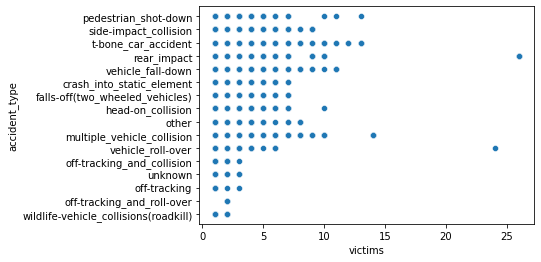

In [15]:
sns.scatterplot(df.victims, df.accident_type) 

In [16]:
df[['accident_type', 'vehicles', 'victims', 'vehicle_type']][df['victims']==0].shape

(0, 4)

In [17]:
df.victims.unique()

array([ 1.,  2.,  3.,  4.,  6.,  5.,  7.,  8.,  9., 13., 11., 10., 26.,
       14., 12., 24.])

<AxesSubplot:xlabel='victims', ylabel='Count'>

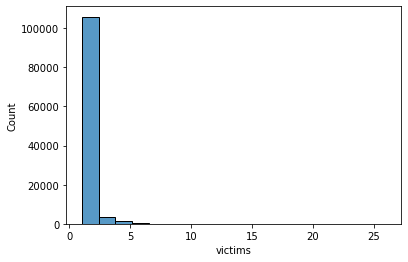

In [18]:
sns.histplot(df.victims)

In [19]:
df[['accident_type', 'vehicles', 'victims', 'vehicle_type']][df['victims']>10].shape

(21, 4)

In [20]:
df['vehicles'][df['victims']>10].unique

<bound method Series.unique of 13425     3
13426     3
15361     2
31954     4
43424     4
43425     4
71539     4
80493     1
80538     2
80643     2
80644     2
98288     1
98614     3
98667     2
98728     2
99125     4
99126     4
99254     1
111094    4
111095    4
111097    1
Name: vehicles, dtype: int64>

In [21]:
df[['accident_type', 'vehicles', 'victims', 'vehicle_type']][(df['victims']>10)&(df['vehicles']==1)]

,accident_type,vehicles,victims,vehicle_type
80493,pedestrian_shot-down,1,13.0,articulated_buses
98288,pedestrian_shot-down,1,11.0,buses
99254,vehicle_fall-down,1,11.0,buses
111097,vehicle_roll-over,1,24.0,school_buses


In [22]:
df['vehicle_type'] = df['vehicle_type'].replace('motorcyle', 'motorcycle')

In [23]:
df['vehicle_type'][df['victims']>10].unique

<bound method Series.unique of 13425         passenger_car
13426         passenger_car
15361         passenger_car
31954         passenger_car
43424         passenger_car
43425         passenger_car
71539            motorcycle
80493     articulated_buses
80538     articulated_buses
80643     articulated_buses
80644     articulated_buses
98288                 buses
98614                 buses
98667                 buses
98728                 buses
99125                 buses
99126                 buses
99254                 buses
111094         school_buses
111095         school_buses
111097         school_buses
Name: vehicle_type, dtype: object>

In [24]:
df[['accident_type', 'vehicles', 'victims', 'vehicle_type']][(df['victims']>10)&(df['vehicle_type']=='motorcycle')|(df['victims']>10)&(df['vehicle_type']=='passenger_car')]

,accident_type,vehicles,victims,vehicle_type
13425,t-bone_car_accident,3,13.0,passenger_car
13426,t-bone_car_accident,3,13.0,passenger_car
15361,t-bone_car_accident,2,11.0,passenger_car
31954,rear_impact,4,26.0,passenger_car
43424,multiple_vehicle_collision,4,14.0,passenger_car
43425,multiple_vehicle_collision,4,14.0,passenger_car
71539,rear_impact,4,26.0,motorcycle


In [25]:
df.drop([15361, 31954, 71539], axis = 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-26-31b7d138a902>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(labels = df["victims"])


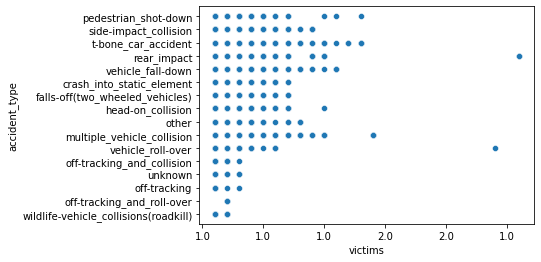

In [26]:
s = sns.scatterplot(df["victims"],df["accident_type"], palette="Set2")
s.set_xticklabels(labels = df["victims"])
plt.show()

In [27]:
df.accident_type.unique()

array(['pedestrian_shot-down', 'side-impact_collision',
       't-bone_car_accident', 'rear_impact', 'vehicle_fall-down',
       'crash_into_static_element', 'falls-off(two_wheeled_vehicles)',
       'head-on_collision', 'other', 'multiple_vehicle_collision',
       'vehicle_roll-over', 'off-tracking_and_collision', 'unknown',
       'off-tracking', 'off-tracking_and_roll-over',
       'wildlife-vehicle_collisions(roadkill)'], dtype=object)

In [28]:
df[['accident_type', 'vehicles', 'victims', 'vehicle_type']][(df['victims']>10)&(df['accident_type']=='rear_impact')|(df['victims']>10)&(df['accident_type']=='vehicle_roll-over')]

,accident_type,vehicles,victims,vehicle_type
99125,rear_impact,4,26.0,buses
99126,rear_impact,4,26.0,buses
111097,vehicle_roll-over,1,24.0,school_buses


In [29]:
df.drop([99125, 99126, 111097], axis = 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


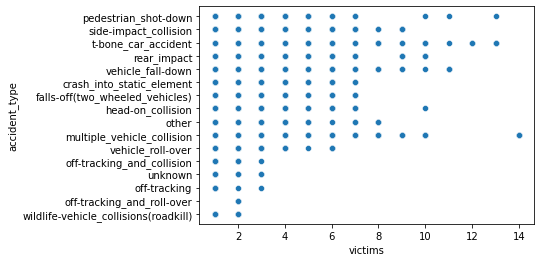

In [30]:
s = sns.scatterplot(df["victims"],df["accident_type"], palette="Set2")
plt.show()

In [31]:
df = pd.concat([df.drop('vehicle_type', axis=1), pd.get_dummies(df['vehicle_type'])], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


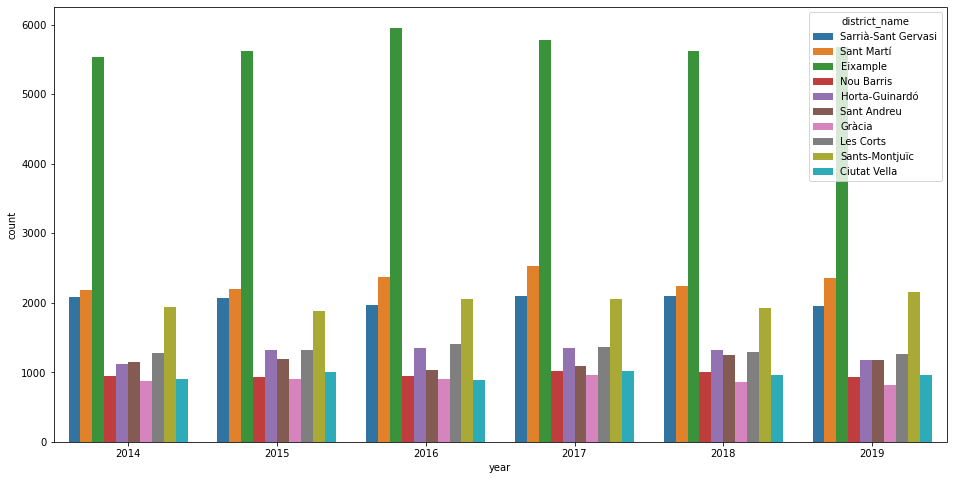

In [32]:
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df['year'], hue = df['district_name'])
plt.show()

In [33]:
df.district_name.unique()

array(['Sarrià-Sant Gervasi', 'Sant Martí', 'Eixample', 'Nou Barris',
       'Horta-Guinardó', 'Sant Andreu', 'Gràcia', 'Les Corts',
       'Sants-Montjuïc', 'Ciutat Vella'], dtype=object)

In [34]:
df1 = df[df['district_name']=='Eixample']
df2 = df[df['district_name']=='Sarrià-Sant Gervasi']
df3 = df[df['district_name']=='Gràcia']
df4 = df[df['district_name']=='Sant Andreu']
df5 = df[df['district_name']=='Sant Martí']
df6 = df[df['district_name']=='Horta-Guinardó']
df7 = df[df['district_name']=='Nou Barris']
df8 = df[df['district_name']=='Les Corts']
df9 = df[df['district_name']=='Sants-Montjuïc']
df10 = df[df['district_name']=='Ciutat Vella']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


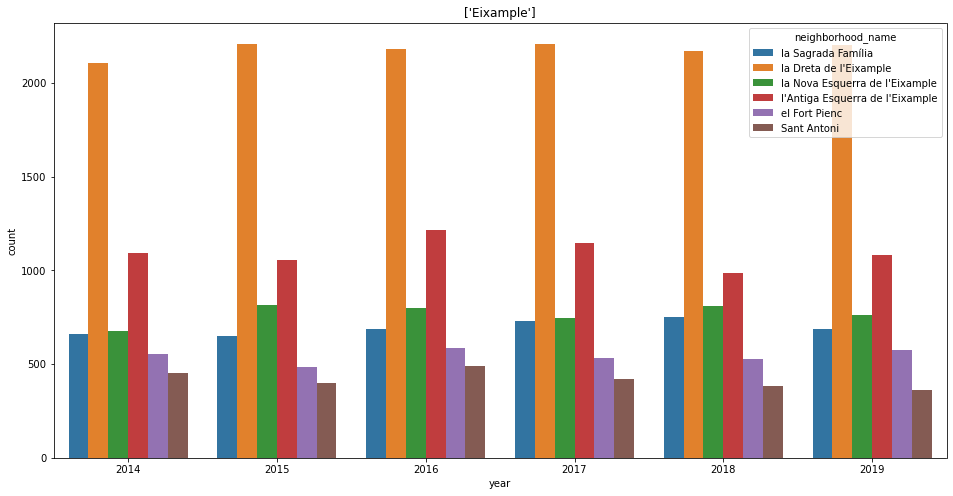

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


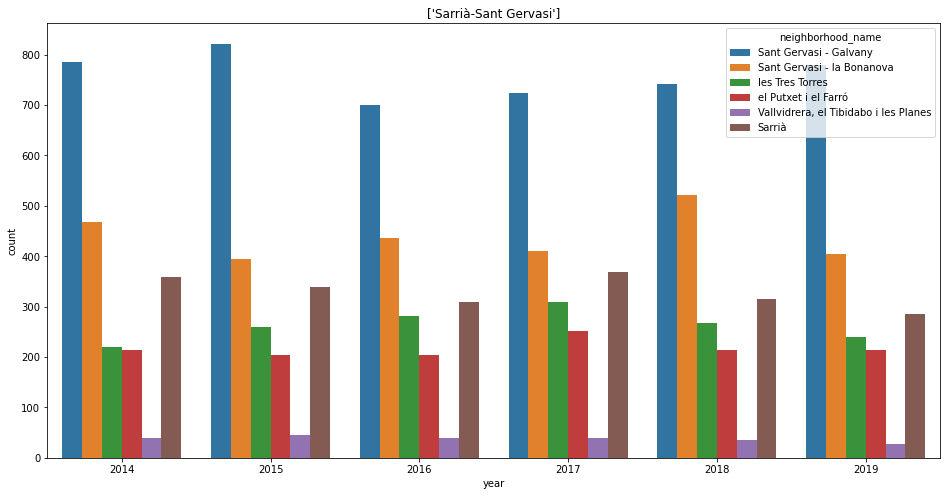

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


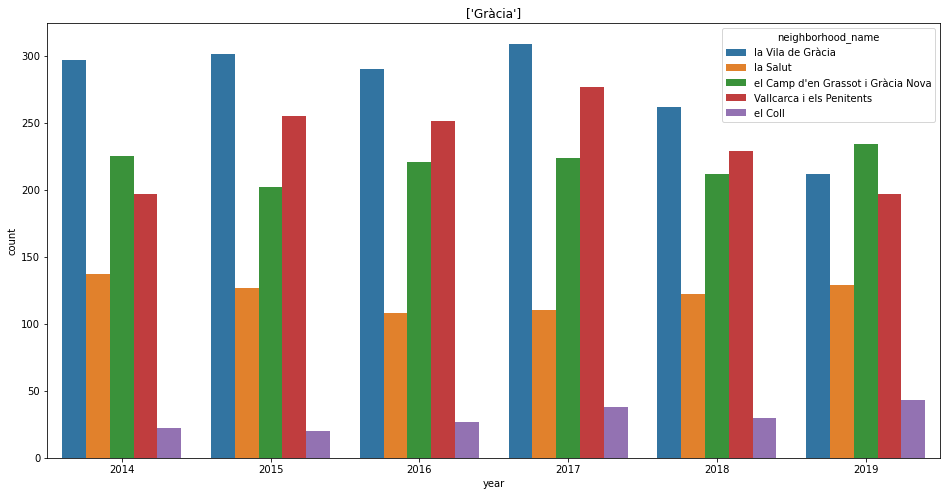

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


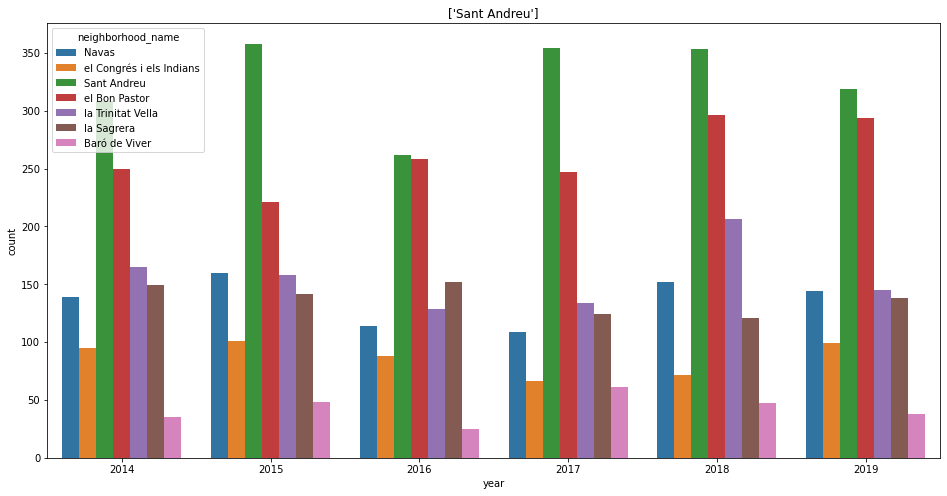

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


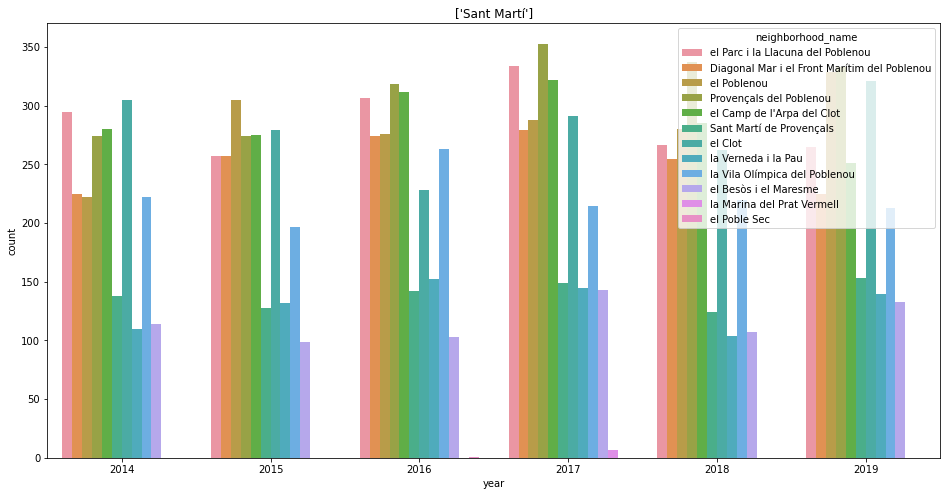

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


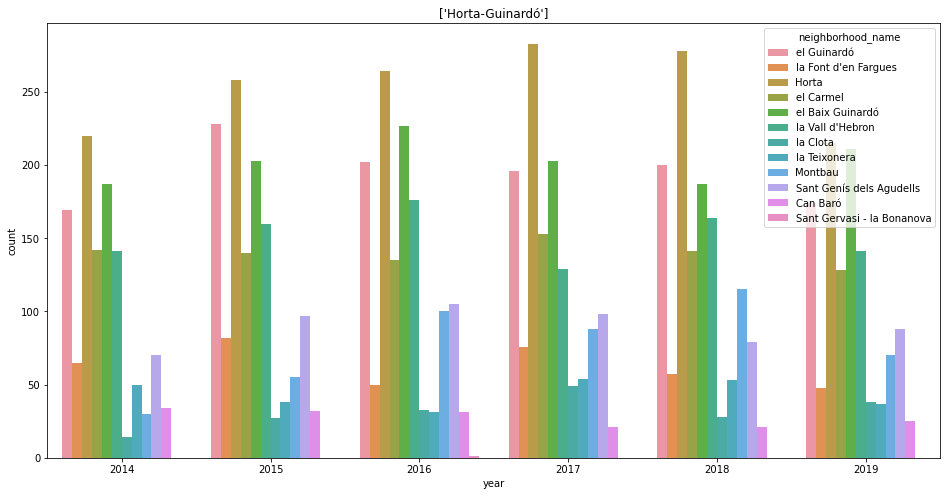

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


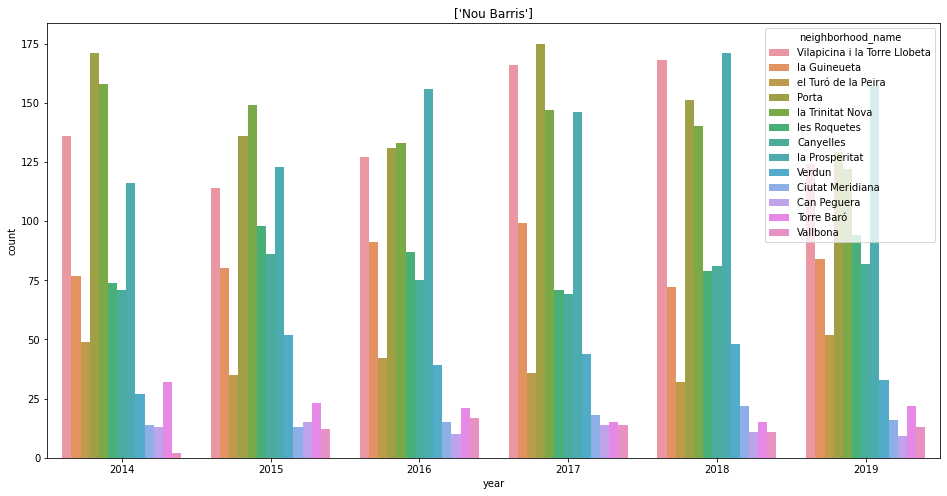

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


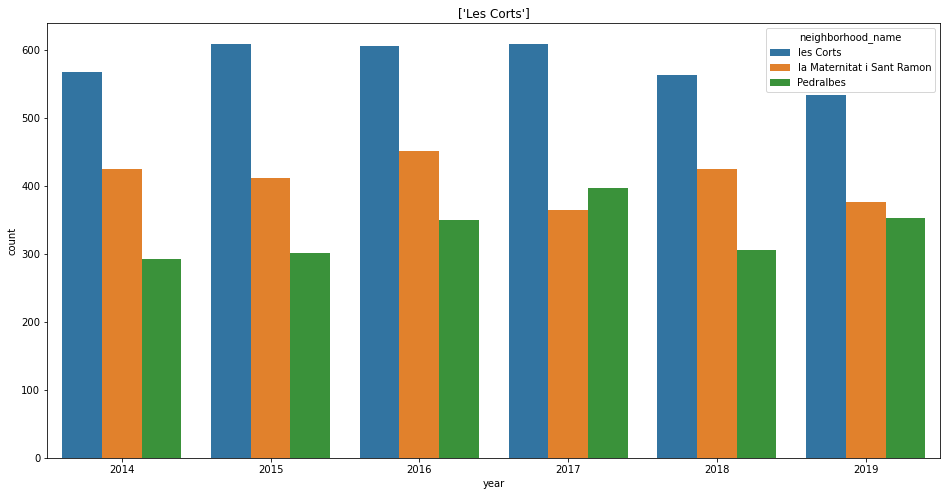

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


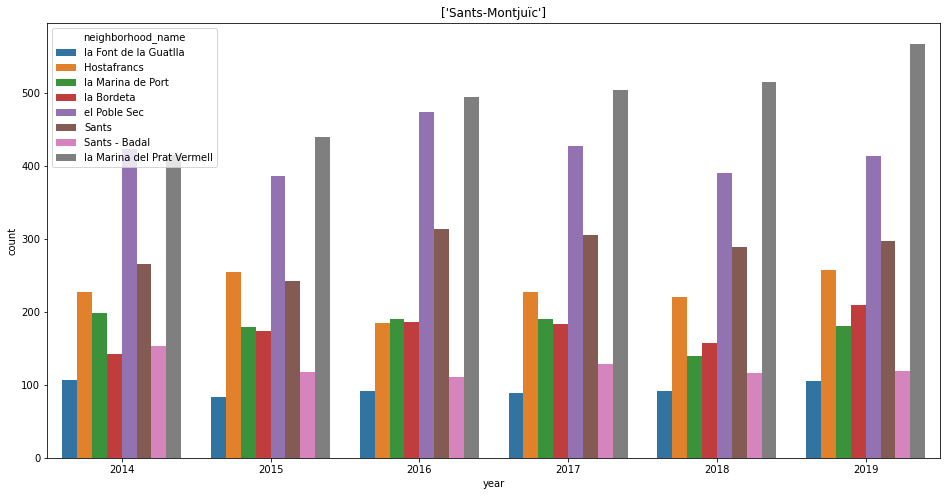

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


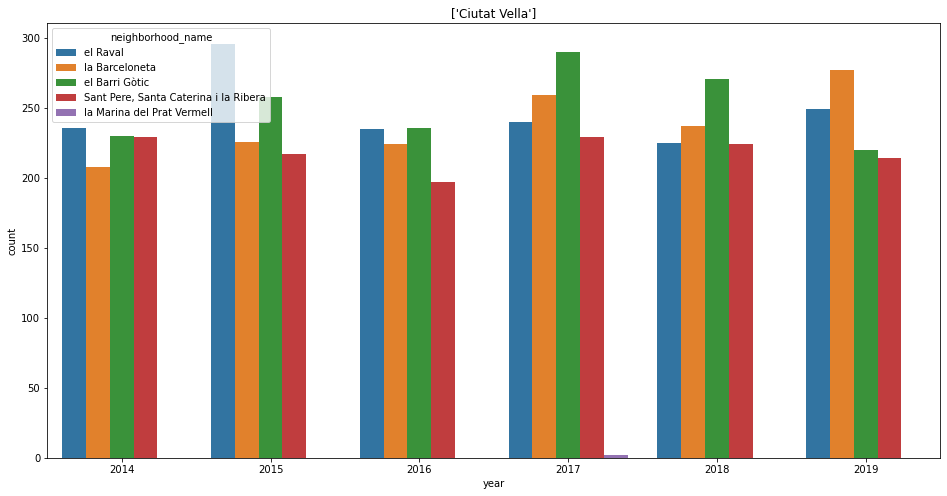

In [35]:
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df1['year'], hue = df1['neighborhood_name'])
plt.title(df1.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df2['year'], hue = df2['neighborhood_name'])
plt.title(df2.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df3['year'], hue = df3['neighborhood_name'])
plt.title(df3.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df4['year'], hue = df4['neighborhood_name'])
plt.title(df4.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df5['year'], hue = df5['neighborhood_name'])
plt.title(df5.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df6['year'], hue = df6['neighborhood_name'])
plt.title(df6.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df7['year'], hue = df7['neighborhood_name'])
plt.title(df7.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df8['year'], hue = df8['neighborhood_name'])
plt.title(df8.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df9['year'], hue = df9['neighborhood_name'])
plt.title(df9.district_name.unique())
plt.show()
fig, ax = plt.subplots (figsize = (16,8))
sns.countplot(df10['year'], hue = df10['neighborhood_name'])
plt.title(df10.district_name.unique())
plt.show()

In [36]:
df.columns

Index(['date', 'id_record', 'id_district', 'district_name', 'id_neighborhood',
       'neighborhood_name', 'id_street', 'street_name', 'weekday', 'year',
       'day', 'shift', 'death', 'minor_injuries', 'severe_injuries', 'victims',
       'vehicles', 'longitude', 'latitude', 'accident_type', 'weekend',
       'holiday', 'adverse weather conditions', 'alcohol', 'any',
       'drugs or medicines', 'excessive speed',
       'objects on the road or animals crossing', 'poor road conditions',
       'traffic signal faults', 'cross outside the crosswalks',
       'cross the highway', 'ignore any traffic-sign', 'ignore traffic-light',
       'other', 'the accident is not the pedestrian's fault', 'unknown',
       'tavg', 'rainfall', 'tmin', 'tmin_hour', 'tmax', 'tmax_hour',
       'wind_direction', 'wind_speed_avg', 'gusts_wind', 'gusts_wind_hour',
       'season', 'articulated_buses', 'bike', 'buses', 'construction_vehicles',
       'electric_scooter', 'jeep', 'microbuses', 'moped', 'motorc

In [37]:
X = df[['severe_injuries', 'minor_injuries', 'victims', 'death', 'vehicles']]

In [38]:
# from sklearn.preprocessing import MinMaxScaler

# scale = MinMaxScaler().fit_transform(X)
# scale.shape

In [39]:
# df['death'] = scale[:,0]
# df['minor_injuries'] = scale[:,1]
# df['severe_injuries'] = scale[:,2]
# df['victims'] = scale[:,3]
# df['vehicles'] = scale[:,4]

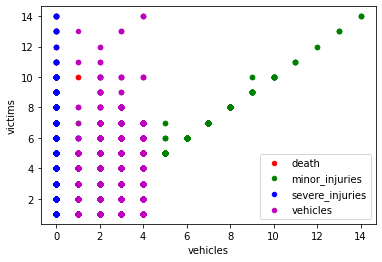

In [40]:
ax1 = df.plot(kind='scatter', x='death', y='victims', color='r', label = 'death')    
ax2 = df.plot(kind='scatter', x='minor_injuries', y='victims', color='g', label = 'minor_injuries', ax=ax1)    
ax3 = df.plot(kind='scatter', x='severe_injuries', y='victims', color='b', label = 'severe_injuries', ax=ax1)
ax5 = df.plot(kind='scatter', x='vehicles', y='victims', color='m', label = 'vehicles', ax=ax1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-41-662953283efd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(rotation=80, labels = df["accident_type"])


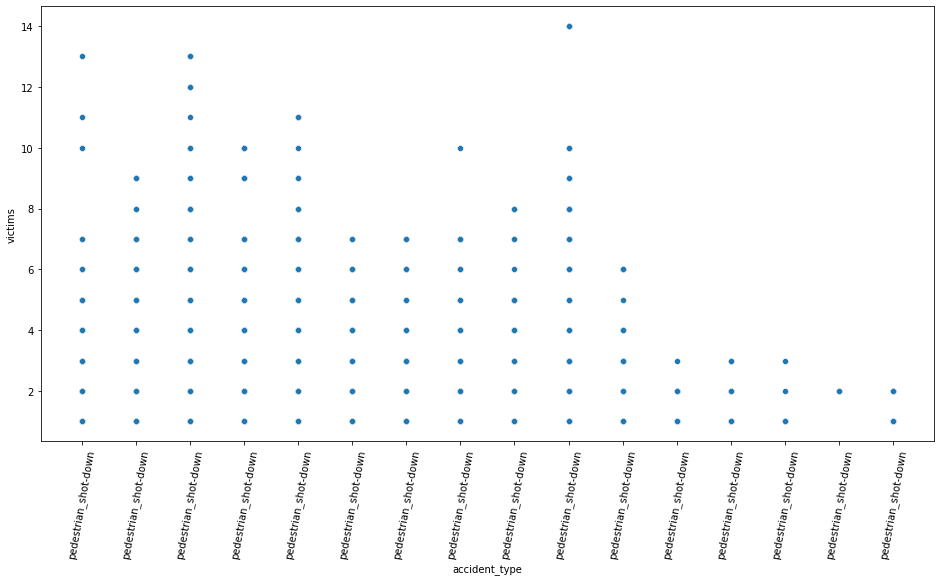

In [41]:
plt.figure(figsize = (16,8))
s = sns.scatterplot(df["accident_type"], df["victims"], palette="Set2")
s.set_xticklabels(rotation=80, labels = df["accident_type"])
plt.show()

In [42]:
df = pd.concat([df.drop('shift', axis=1), pd.get_dummies(df['shift'])], axis=1)
df = pd.concat([df.drop('season', axis=1), pd.get_dummies(df['season'])], axis=1)
df = pd.concat([df.drop('weekday', axis=1), pd.get_dummies(df['weekday'])], axis=1)

In [43]:
df.drop(['any', 'unknown', 'other', 'day'], axis = 1, inplace = True)
df.shape

(111604, 78)

In [44]:
X.corr()

,severe_injuries,minor_injuries,victims,death,vehicles
severe_injuries,1.000000,-0.144710,0.034764,0.037159,-0.023486
minor_injuries,-0.144710,1.000000,0.927493,-0.041589,0.200522
victims,0.034764,0.927493,1.000000,0.021677,0.204626
death,0.037159,-0.041589,0.021677,1.000000,-0.010963
vehicles,-0.023486,0.200522,0.204626,-0.010963,1.000000


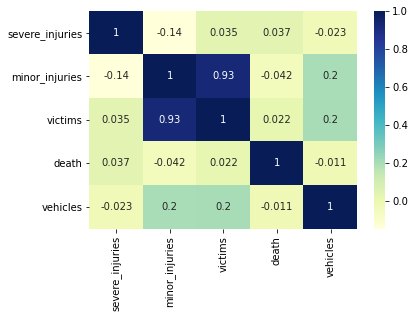

In [45]:
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [46]:
X.head()

,severe_injuries,minor_injuries,victims,death,vehicles
0,1,0,1.0,0,1
1,0,1,1.0,0,1
2,0,1,1.0,0,1
3,0,1,1.0,0,2
4,0,2,2.0,0,1


In [47]:
from sklearn.decomposition import PCA

X = PCA(n_components = 2).fit_transform(X)

In [48]:
X.shape

(111604, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

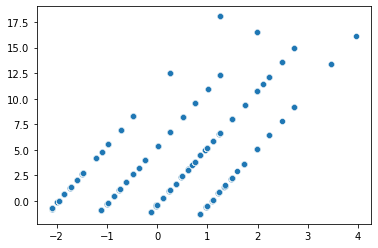

In [49]:
sns.scatterplot(X[:,1], X[:,0], palette = 'Set2')

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="random", max_iter=20, tol = 0.02)
kmeans.fit(X)
df['k_class'] = kmeans.labels_

In [51]:
df.k_class.unique()

array([0, 1, 2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

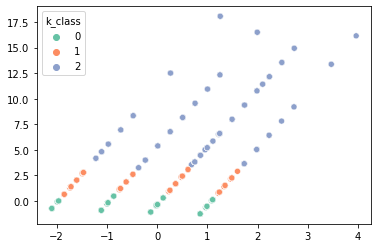

In [52]:
sns.scatterplot(X[:,1], X[:,0], hue = df.k_class, palette = 'Set2')

In [53]:
kmeans.cluster_centers_

array([[-0.42692637, -0.0231571 ],
       [ 1.30901606,  0.07369002],
       [ 4.99560978,  0.24361207]])

In [54]:
kmeans.n_iter_

8

In [55]:
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[161959.9434022631,
 83581.83688601972,
 58049.67986350499,
 41843.221901842204,
 32136.348470204055,
 22451.38086912493,
 17655.76605287412,
 14869.533596126339,
 12262.929220257778,
 10866.10796570053]

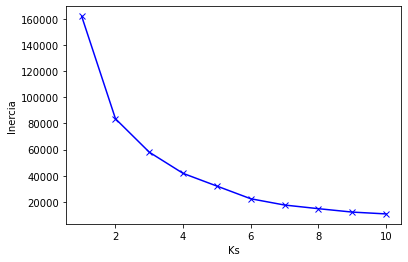

In [56]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [57]:
kmeans = KMeans(n_clusters=2, init="random", max_iter=100, tol = 0.02, algorithm = 'elkan')
kmeans.fit(X)
df['k2_class'] = kmeans.labels_

In [58]:
df.k2_class.unique()

array([1, 0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


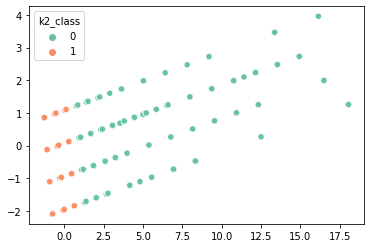

In [59]:
sns.scatterplot(X[:,0], X[:,1], hue = df['k2_class'], palette="Set2")
plt.show()

In [60]:
kmeans.cluster_centers_

array([[ 1.61813786,  0.09427647],
       [-0.42949134, -0.02502316]])

In [61]:
kmeans.n_iter_

2

In [62]:
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[161959.9434022631,
 83581.83688601972,
 58049.67986350499,
 40567.374714770616,
 30860.518461361844,
 23664.31940158861,
 18855.57570097082,
 15087.208237133476,
 12185.129350404392,
 11855.656269753812]

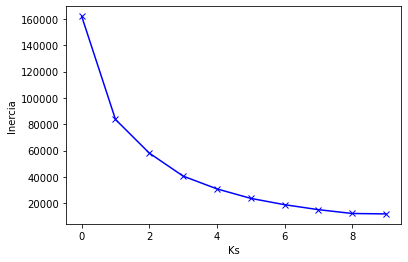

In [63]:
plt.plot(range(len(inercias)), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [64]:
df.drop(['k_class'], axis = 1, inplace = True)

In [68]:
df['severity'] = np.nan

In [69]:
df['severity'][(df.death != 0) | (df.severe_injuries != 0) | ((df.vehicles > df.vehicles.mean()) & (df.victims > df.vehicles.mean()))] = df['severe'][(df.death != 0) | (df.severe_injuries != 0) | ((df.vehicles > df.vehicles.mean()) & (df.victims > df.vehicles.mean()))].replace(np.nan, 1)

<ipython-input-69-4e1df8c71f35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity'][(df.death != 0) | (df.severe_injuries != 0) | ((df.vehicles > df.vehicles.mean()) & (df.victims > df.vehicles.mean()))] = df['severe'][(df.death != 0) | (df.severe_injuries != 0) | ((df.vehicles > df.vehicles.mean()) & (df.victims > df.vehicles.mean()))].replace(np.nan, 1)


In [70]:
df['severity'] = df['severity'].replace(np.nan, 0)

In [71]:
df.severe.unique()

array([ 1., nan])

In [72]:
df.shape

(111604, 81)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


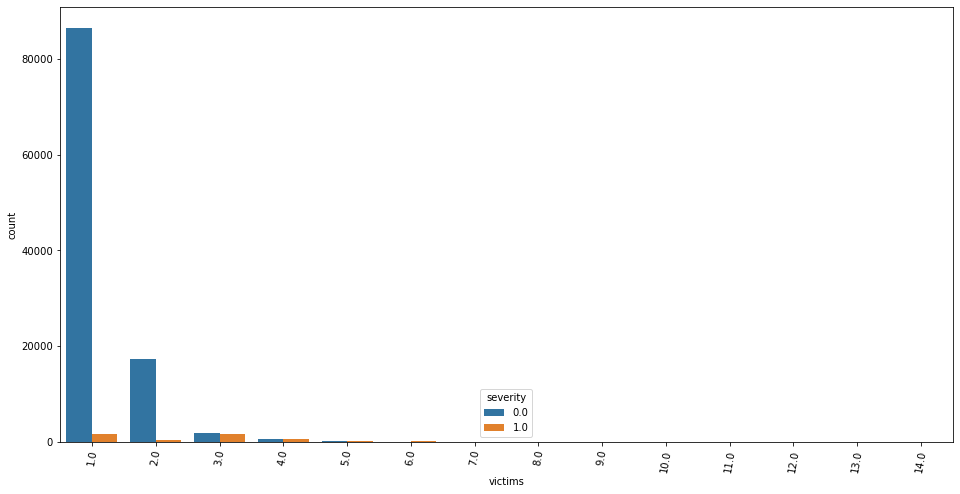

In [73]:
fig, ax = plt.subplots (figsize = (16,8))
s = sns.countplot(df['victims'], hue = df['severity'])
s.set_xticklabels(s.get_xticklabels(), rotation = 80)
plt.show()

In [74]:
df = pd.concat([df.drop('accident_type', axis=1), pd.get_dummies(df['accident_type'])], axis=1)

In [75]:
df.columns

Index(['date', 'id_record', 'id_district', 'district_name', 'id_neighborhood',
       'neighborhood_name', 'id_street', 'street_name', 'year', 'death',
       'minor_injuries', 'severe_injuries', 'victims', 'vehicles', 'longitude',
       'latitude', 'weekend', 'holiday', 'adverse weather conditions',
       'alcohol', 'drugs or medicines', 'excessive speed',
       'objects on the road or animals crossing', 'poor road conditions',
       'traffic signal faults', 'cross outside the crosswalks',
       'cross the highway', 'ignore any traffic-sign', 'ignore traffic-light',
       'the accident is not the pedestrian's fault', 'tavg', 'rainfall',
       'tmin', 'tmin_hour', 'tmax', 'tmax_hour', 'wind_direction',
       'wind_speed_avg', 'gusts_wind', 'gusts_wind_hour', 'articulated_buses',
       'bike', 'buses', 'construction_vehicles', 'electric_scooter', 'jeep',
       'microbuses', 'moped', 'motorcycle', 'motorhome',
       'non-motorized_transport', 'other_vehicles', 'passenger_car',

In [76]:
X = df[['id_neighborhood', 'weekend', 'holiday', 'tavg', 'rainfall',
       'afternoon', 'early_morning', 'evening', 'morning', 'autumn', 'spring',
       'summer', 'winter', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'wind_direction', 'wind_speed_avg', 'articulated_buses',
       'bike', 'buses', 'construction_vehicles', 'electric_scooter', 'jeep',
       'microbuses', 'moped', 'motorcycle', 'motorhome',
       'non-motorized_transport', 'passenger_car', 'pick, up',
       'quad', 'rigid_truck', 'school_buses', 'semi_tractor', 'taxi',
       'tram_or_train', 'truck']]

y = df['severity']

In [77]:
X.wind_speed_avg = X.wind_speed_avg.replace(np.nan, 0)
X.rainfall = X.rainfall.replace(np.nan, 0)
X.tavg = X.tavg.replace(np.nan, 0)
X.wind_direction = X.wind_direction.replace(np.nan, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [78]:
from collections import Counter
Counter(y)

Counter({1.0: 4897, 0.0: 106707})

In [79]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)
X.shape

(111604, 42)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

## Naive Bayes Classifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test, ypred)

0.10886446448838182

In [83]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[ 2213, 29754],
       [   83,  1432]], dtype=int64)

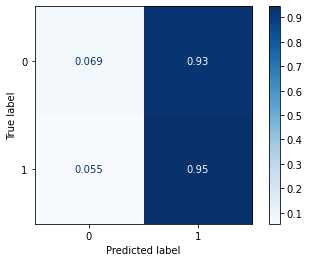

In [84]:
disp = plot_confusion_matrix(gnb, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.5859369000684597


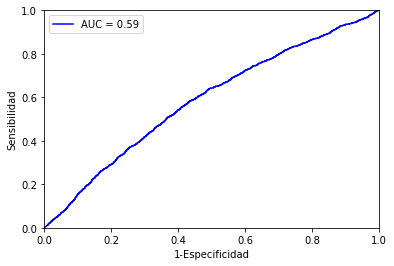

In [85]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [86]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.964     0.069     0.129     31967
         1.0      0.046     0.945     0.088      1515

    accuracy                          0.109     33482
   macro avg      0.505     0.507     0.108     33482
weighted avg      0.922     0.109     0.127     33482



## AdaBoost Classifier

In [87]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [88]:
# from sklearn.ensemble import AdaBoostClassifier

# ac = AdaBoostClassifier().fit(X_train, y_train)
# ypred = ac.predict(X_test)
# accuracy_score(y_test, ypred)

In [89]:
# confusion_matrix(y_test, ypred, labels=[0,1])

In [90]:
# disp = plot_confusion_matrix(ac, X_test, y_test,
#                              display_labels=[0,1],
#                              cmap=plt.cm.Blues,
#                              normalize="true")
# plt.show()

In [91]:
# probs = ac.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)
# print("Area bajo la curva: ",auc(fpr, tpr))
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.legend()
# plt.ylabel('Sensibilidad')
# plt.xlabel('1-Especificidad')
# plt.show()

In [92]:
# print(classification_report(y_test, ypred, digits=3))

## AdaBoost Classifier (SMOTE)

In [93]:
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [94]:
# from sklearn.ensemble import AdaBoostClassifier

# ac = AdaBoostClassifier().fit(X_train, y_train)
# ypred = ac.predict(X_test)
# accuracy_score(y_test, ypred)

In [95]:
# confusion_matrix(y_test, ypred, labels=[0,1])

In [96]:
# disp = plot_confusion_matrix(ac, X_test, y_test,
#                              display_labels=[0,1],
#                              cmap=plt.cm.Blues,
#                              normalize="true")
# plt.show()

In [97]:
# probs = ac.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, preds)
# roc_auc = auc(fpr, tpr)
# print("Area bajo la curva: ",auc(fpr, tpr))
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.legend()
# plt.ylabel('Sensibilidad')
# plt.xlabel('1-Especificidad')
# plt.show()

In [98]:
# print(classification_report(y_test, ypred, digits=3))

## Random Forest Classifier

In [99]:
X.shape

(111604, 42)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [101]:
X_train.shape

(78122, 42)

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.965533719610537

In [103]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[31751,   237],
       [  917,   577]], dtype=int64)

In [104]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[31751,   237],
       [  917,   577]], dtype=int64)

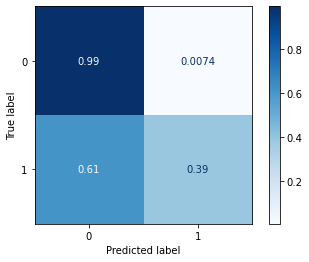

In [105]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.8340861465954686


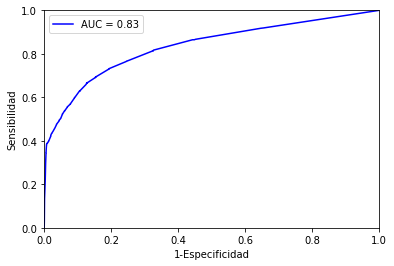

In [106]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [107]:
X_test[0]

array([0.15277778, 0.        , 0.        , 0.65333333, 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.22222222, 0.3381295 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [108]:
rfm.predict(np.array([X_test[0]]))

array([0.])

In [109]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.972     0.993     0.982     31988
         1.0      0.709     0.386     0.500      1494

    accuracy                          0.966     33482
   macro avg      0.840     0.689     0.741     33482
weighted avg      0.960     0.966     0.961     33482



Feature ranking:
1. feature 0 (0.223117)
2. feature 3 (0.168897)
3. feature 20 (0.147169)
4. feature 21 (0.138315)
5. feature 4 (0.053945)
6. feature 5 (0.017928)
7. feature 7 (0.017578)
8. feature 10 (0.015209)
9. feature 8 (0.014878)
10. feature 9 (0.014645)
11. feature 33 (0.014640)
12. feature 30 (0.014021)
13. feature 12 (0.013083)
14. feature 11 (0.012370)
15. feature 19 (0.011686)
16. feature 18 (0.011404)
17. feature 17 (0.011080)
18. feature 14 (0.010774)
19. feature 6 (0.009790)
20. feature 1 (0.009507)
21. feature 13 (0.009292)
22. feature 39 (0.007499)
23. feature 15 (0.007382)
24. feature 16 (0.007304)
25. feature 29 (0.006952)
26. feature 2 (0.006126)
27. feature 23 (0.005944)
28. feature 24 (0.005650)
29. feature 41 (0.002929)
30. feature 36 (0.002805)
31. feature 37 (0.001502)
32. feature 26 (0.001465)
33. feature 27 (0.001215)
34. feature 38 (0.001210)
35. feature 22 (0.001013)
36. feature 40 (0.000601)
37. feature 32 (0.000410)
38. feature 25 (0.000302)
39. feature 31

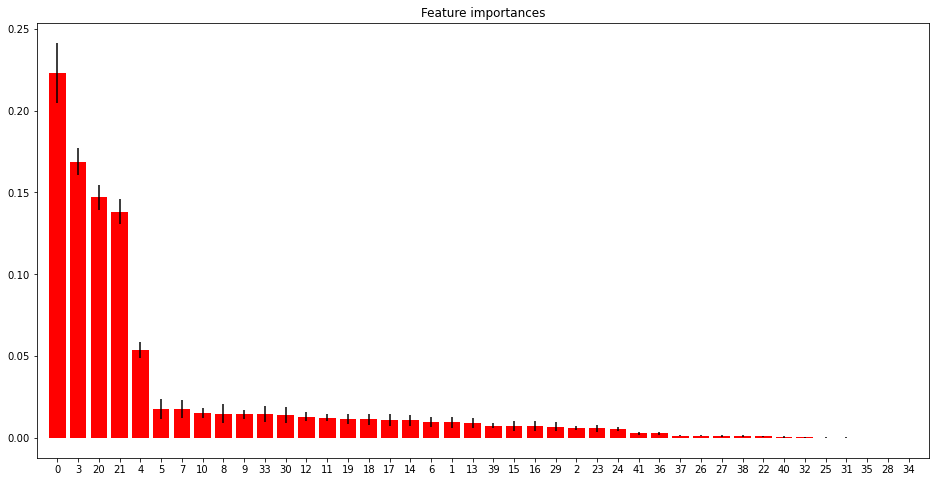

In [110]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random Forest Classifier (SMOTE)

In [112]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(sampling_strategy = 0.8).fit_sample(X, y)

In [113]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3)

In [114]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier().fit(X_train_sm, y_train_sm)
ypred = rfm.predict(X_test_sm)
accuracy_score(y_test_sm, ypred)

0.9743847835896012

In [115]:
confusion_matrix(y_test_sm, ypred, labels=[0,1])

array([[31571,   564],
       [  912, 24575]], dtype=int64)

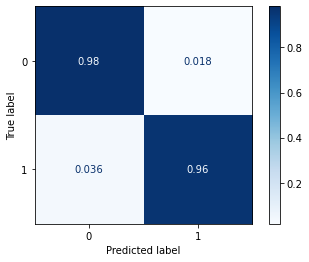

In [116]:
disp = plot_confusion_matrix(rfm, X_test_sm, y_test_sm,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.9940341143172665


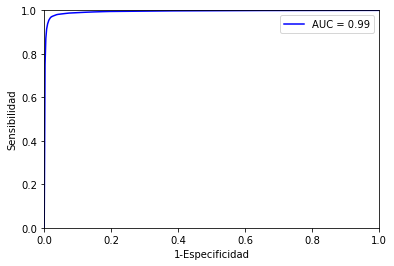

In [117]:
probs = rfm.predict_proba(X_test_sm)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sm, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [118]:
print(classification_report(y_test_sm, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.972     0.982     0.977     32135
         1.0      0.978     0.964     0.971     25487

    accuracy                          0.974     57622
   macro avg      0.975     0.973     0.974     57622
weighted avg      0.974     0.974     0.974     57622



Feature ranking:
1. feature 0 (0.209740)
2. feature 20 (0.162528)
3. feature 21 (0.153022)
4. feature 3 (0.138080)
5. feature 4 (0.061044)
6. feature 33 (0.023096)
7. feature 5 (0.015706)
8. feature 7 (0.015567)
9. feature 29 (0.013971)
10. feature 30 (0.013625)
11. feature 8 (0.013431)
12. feature 23 (0.012452)
13. feature 10 (0.012288)
14. feature 9 (0.012143)
15. feature 12 (0.011113)
16. feature 11 (0.010883)
17. feature 19 (0.010222)
18. feature 18 (0.010089)
19. feature 17 (0.010067)
20. feature 39 (0.009901)
21. feature 14 (0.009283)
22. feature 1 (0.009017)
23. feature 6 (0.008709)
24. feature 13 (0.008612)
25. feature 2 (0.007843)
26. feature 24 (0.007701)
27. feature 16 (0.007612)
28. feature 15 (0.007557)
29. feature 36 (0.004050)
30. feature 41 (0.004017)
31. feature 26 (0.001625)
32. feature 27 (0.001144)
33. feature 37 (0.001024)
34. feature 38 (0.000973)
35. feature 22 (0.000844)
36. feature 40 (0.000452)
37. feature 32 (0.000191)
38. feature 25 (0.000168)
39. feature 35

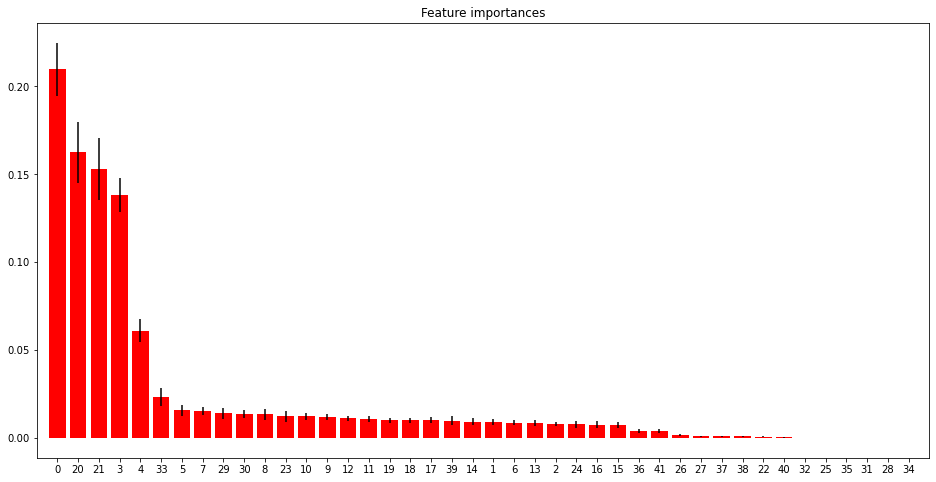

In [119]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X_sm.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_sm.shape[1]), indices)
plt.xlim([-1, X_sm.shape[1]])
plt.show()

## Random Forest Classifier (GridSearchCV)

In [120]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rfm = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# params = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [100, 350, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [7, 15],
#     'min_impurity_decrease' : [0.02, 0.04, 0.2]
# }

# CV_rfm = GridSearchCV(estimator=rfm, param_grid=params, cv= 5)
# CV_rfm.fit(X_train, y_train)
# print (CV_rfm.best_params_) 

##{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [122]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 'auto',
                             class_weight = 'balanced',
                             n_estimators= 100).fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.6771996893853414

In [123]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[21911, 10098],
       [  710,   763]], dtype=int64)

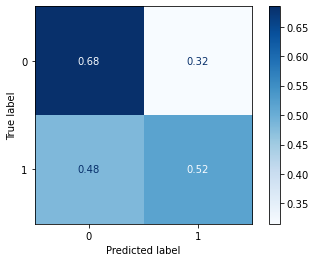

In [124]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.6455880948452697


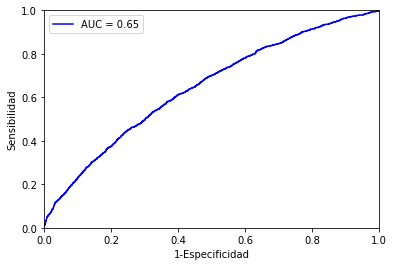

In [125]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [126]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.969     0.685     0.802     32009
         1.0      0.070     0.518     0.124      1473

    accuracy                          0.677     33482
   macro avg      0.519     0.601     0.463     33482
weighted avg      0.929     0.677     0.772     33482



Feature ranking:
1. feature 0 (0.217790)
2. feature 3 (0.105857)
3. feature 33 (0.093324)
4. feature 21 (0.081608)
5. feature 20 (0.073861)
6. feature 4 (0.054987)
7. feature 30 (0.052296)
8. feature 8 (0.034443)
9. feature 6 (0.024943)
10. feature 1 (0.023342)
11. feature 29 (0.022890)
12. feature 16 (0.022878)
13. feature 23 (0.019207)
14. feature 15 (0.015903)
15. feature 5 (0.015852)
16. feature 7 (0.013219)
17. feature 14 (0.011815)
18. feature 9 (0.011272)
19. feature 11 (0.011116)
20. feature 10 (0.010626)
21. feature 2 (0.010385)
22. feature 12 (0.009922)
23. feature 17 (0.009026)
24. feature 13 (0.008311)
25. feature 19 (0.007670)
26. feature 18 (0.006008)
27. feature 39 (0.005663)
28. feature 26 (0.005125)
29. feature 37 (0.003221)
30. feature 40 (0.002604)
31. feature 24 (0.002487)
32. feature 22 (0.002268)
33. feature 27 (0.001965)
34. feature 41 (0.001928)
35. feature 36 (0.001912)
36. feature 38 (0.001886)
37. feature 31 (0.001156)
38. feature 32 (0.000720)
39. feature 35

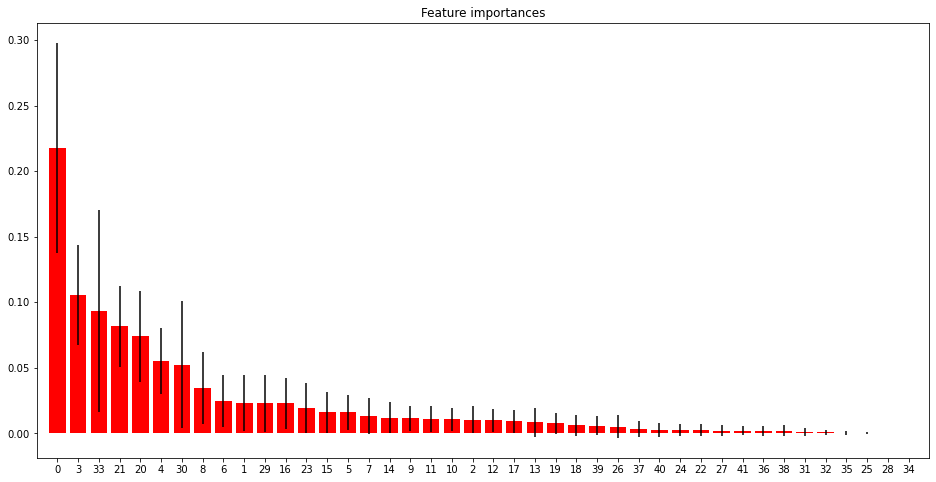

In [127]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [128]:
import pickle

filename = 'randomforest_finalproject.sav'
pickle.dump(rfm, open(filename, 'wb'))

In [129]:
df.columns[4]

'id_neighborhood'

In [130]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Eixample

In [139]:
df_exi = df[df['district_name']=='Eixample'].reset_index()
df_exi.shape

(34193, 97)

In [140]:
X = df_exi[['id_neighborhood', 'weekend', 'holiday', 'tavg', 'rainfall',
       'afternoon', 'early_morning', 'evening', 'morning', 'autumn', 'spring',
       'summer', 'winter', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'wind_direction', 'wind_speed_avg', 'articulated_buses',
       'bike', 'buses', 'construction_vehicles', 'electric_scooter', 'jeep',
       'microbuses', 'moped', 'motorcycle', 'motorhome',
       'non-motorized_transport', 'passenger_car', 'pickup',
       'quad', 'rigid_truck', 'school_buses', 'semi_tractor', 'taxi',
       'tram_or_train', 'truck']]

y = df_exi['severity']

In [141]:
X.wind_speed_avg = X.wind_speed_avg.replace(np.nan, 0)
X.rainfall = X.rainfall.replace(np.nan, 0)
X.tavg = X.tavg.replace(np.nan, 0)
X.wind_direction = X.wind_direction.replace(np.nan, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [142]:
from collections import Counter
Counter(y)

Counter({0.0: 33151, 1.0: 1042})

## Random Forest Classifier

In [143]:
X.shape

(34193, 42)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [145]:
X_train.shape

(23935, 42)

In [146]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.9727042308442192

In [147]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[9887,   67],
       [ 213,   91]], dtype=int64)

In [148]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[9887,   67],
       [ 213,   91]], dtype=int64)

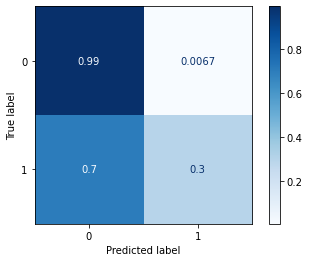

In [149]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.8318305322906422


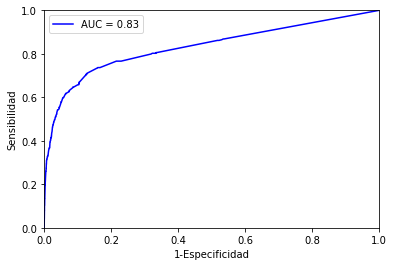

In [150]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [151]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.979     0.993     0.986      9954
         1.0      0.576     0.299     0.394       304

    accuracy                          0.973     10258
   macro avg      0.777     0.646     0.690     10258
weighted avg      0.967     0.973     0.968     10258



Feature ranking:
1. feature 3 (0.176418)
2. feature 20 (0.156570)
3. feature 21 (0.136903)
4. feature 0 (0.110847)
5. feature 4 (0.057901)
6. feature 5 (0.024622)
7. feature 33 (0.024179)
8. feature 30 (0.024084)
9. feature 7 (0.022931)
10. feature 8 (0.020024)
11. feature 9 (0.018911)
12. feature 10 (0.018131)
13. feature 12 (0.017335)
14. feature 11 (0.015794)
15. feature 1 (0.014472)
16. feature 19 (0.014352)
17. feature 17 (0.014122)
18. feature 14 (0.013584)
19. feature 18 (0.012992)
20. feature 6 (0.012134)
21. feature 13 (0.012006)
22. feature 23 (0.011684)
23. feature 15 (0.011606)
24. feature 16 (0.011041)
25. feature 29 (0.010960)
26. feature 39 (0.010699)
27. feature 2 (0.006252)
28. feature 24 (0.006177)
29. feature 41 (0.002369)
30. feature 36 (0.002176)
31. feature 22 (0.002011)
32. feature 26 (0.001754)
33. feature 37 (0.001265)
34. feature 27 (0.001149)
35. feature 40 (0.001020)
36. feature 32 (0.000807)
37. feature 25 (0.000405)
38. feature 35 (0.000222)
39. feature 38

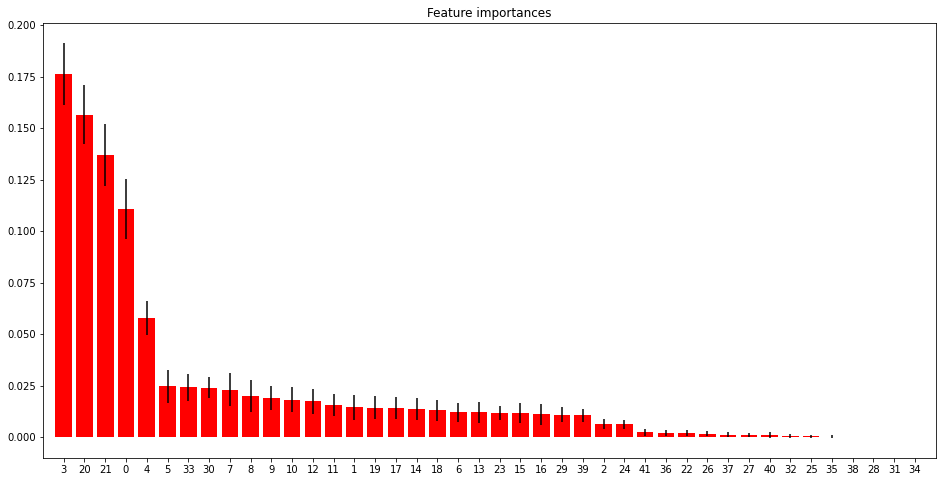

In [152]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random Forest Classifier (SMOTE)

In [153]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(sampling_strategy = 0.8).fit_sample(X, y)

In [154]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3)

In [155]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier().fit(X_train_sm, y_train_sm)
ypred = rfm.predict(X_test_sm)
accuracy_score(y_test_sm, ypred)

0.982739358730868

In [156]:
confusion_matrix(y_test_sm, ypred, labels=[0,1])

array([[9862,  124],
       [ 185, 7731]], dtype=int64)

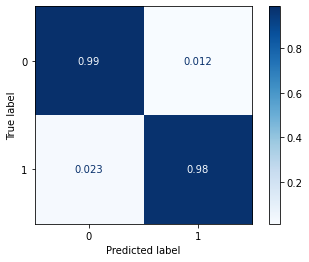

In [157]:
disp = plot_confusion_matrix(rfm, X_test_sm, y_test_sm,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.9953778265822786


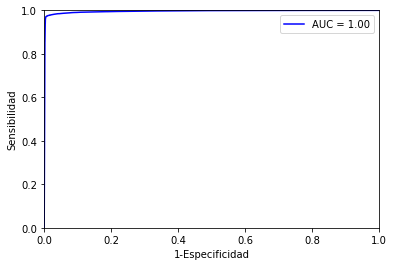

In [158]:
probs = rfm.predict_proba(X_test_sm)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sm, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [159]:
print(classification_report(y_test_sm, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.982     0.988     0.985      9986
         1.0      0.984     0.977     0.980      7916

    accuracy                          0.983     17902
   macro avg      0.983     0.982     0.982     17902
weighted avg      0.983     0.983     0.983     17902



Feature ranking:
1. feature 3 (0.108910)
2. feature 20 (0.103752)
3. feature 0 (0.094639)
4. feature 21 (0.092459)
5. feature 30 (0.053905)
6. feature 33 (0.049063)
7. feature 8 (0.038128)
8. feature 4 (0.037163)
9. feature 5 (0.035612)
10. feature 7 (0.034727)
11. feature 29 (0.033364)
12. feature 39 (0.030765)
13. feature 14 (0.030178)
14. feature 17 (0.025871)
15. feature 23 (0.025817)
16. feature 19 (0.025601)
17. feature 18 (0.024530)
18. feature 1 (0.018923)
19. feature 13 (0.017255)
20. feature 6 (0.015898)
21. feature 9 (0.014981)
22. feature 10 (0.014635)
23. feature 12 (0.013001)
24. feature 11 (0.012126)
25. feature 15 (0.011444)
26. feature 16 (0.010540)
27. feature 24 (0.009896)
28. feature 2 (0.003612)
29. feature 26 (0.003425)
30. feature 41 (0.003139)
31. feature 36 (0.002770)
32. feature 27 (0.001107)
33. feature 22 (0.000992)
34. feature 37 (0.000832)
35. feature 32 (0.000349)
36. feature 25 (0.000155)
37. feature 38 (0.000121)
38. feature 35 (0.000095)
39. feature 28

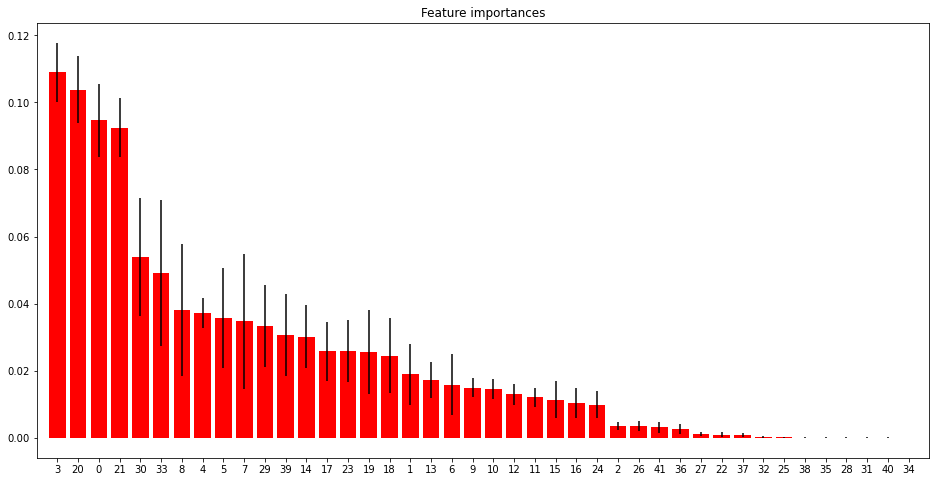

In [160]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X_sm.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_sm.shape[1]), indices)
plt.xlim([-1, X_sm.shape[1]])
plt.show()

In [161]:
X.columns[[3,20,0,21,33,30]]

Index(['tavg', 'wind_direction', 'id_neighborhood', 'wind_speed_avg',
       'passenger_car', 'motorcycle'],
      dtype='object')

## Random Forest Classifier (GridSearchCV)

In [162]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rfm = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# params = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [100, 350, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [7, 15],
#     'min_impurity_decrease' : [0.02, 0.04, 0.2]
# }

# CV_rfm = GridSearchCV(estimator=rfm, param_grid=params, cv= 5)
# CV_rfm.fit(X_train, y_train)
# print (CV_rfm.best_params_) 

##{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [164]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 'auto',
                             class_weight = 'balanced',
                             n_estimators= 100).fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.8431468122441022

In [165]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[8544, 1408],
       [ 201,  105]], dtype=int64)

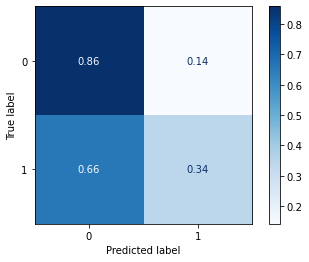

In [166]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.7155967927095811


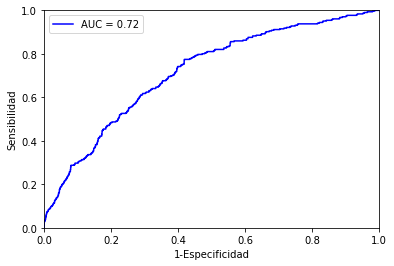

In [167]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [168]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

         0.0      0.977     0.859     0.914      9952
         1.0      0.069     0.343     0.115       306

    accuracy                          0.843     10258
   macro avg      0.523     0.601     0.515     10258
weighted avg      0.950     0.843     0.890     10258



Feature ranking:
1. feature 3 (0.139102)
2. feature 20 (0.133100)
3. feature 21 (0.112487)
4. feature 4 (0.086491)
5. feature 0 (0.077586)
6. feature 16 (0.042375)
7. feature 1 (0.029808)
8. feature 14 (0.026741)
9. feature 7 (0.026191)
10. feature 8 (0.024198)
11. feature 10 (0.023493)
12. feature 15 (0.022680)
13. feature 12 (0.022038)
14. feature 6 (0.021562)
15. feature 5 (0.018698)
16. feature 13 (0.018213)
17. feature 9 (0.016184)
18. feature 33 (0.015725)
19. feature 11 (0.015407)
20. feature 30 (0.014800)
21. feature 17 (0.013623)
22. feature 19 (0.012939)
23. feature 29 (0.012781)
24. feature 39 (0.012247)
25. feature 23 (0.011503)
26. feature 2 (0.011363)
27. feature 18 (0.008668)
28. feature 24 (0.007435)
29. feature 36 (0.004453)
30. feature 41 (0.003330)
31. feature 26 (0.002882)
32. feature 37 (0.002846)
33. feature 22 (0.002538)
34. feature 27 (0.001458)
35. feature 35 (0.001307)
36. feature 31 (0.001207)
37. feature 40 (0.001110)
38. feature 25 (0.000972)
39. feature 32

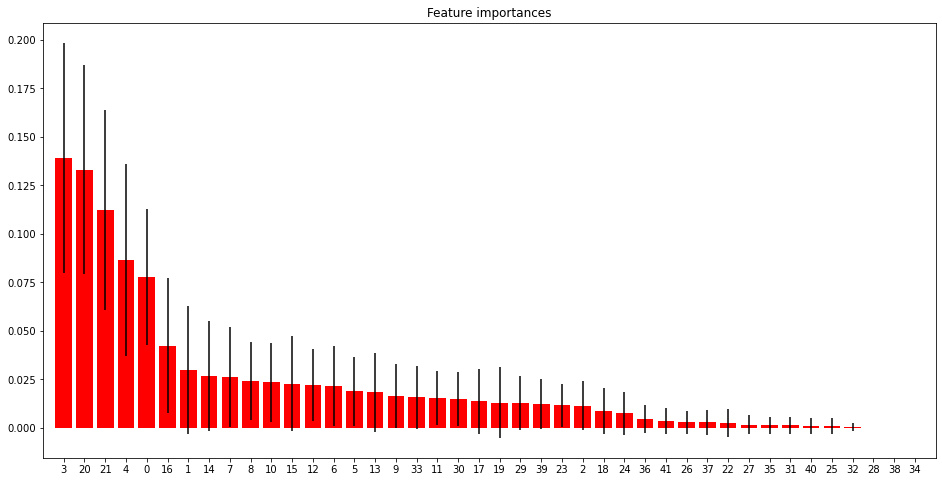

In [169]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [170]:
X.columns[[3,20,21,0,4]]

Index(['tavg', 'wind_direction', 'wind_speed_avg', 'id_neighborhood',
       'rainfall'],
      dtype='object')

## K2_class

In [171]:
X = df[['id_neighborhood', 'weekend', 'holiday', 'tavg', 'rainfall',
       'afternoon', 'early_morning', 'evening', 'morning', 'autumn', 'spring',
       'summer', 'winter', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'wind_direction', 'wind_speed_avg', 'articulated_buses',
       'bike', 'buses', 'construction_vehicles', 'electric_scooter', 'jeep',
       'microbuses', 'moped', 'motorcycle', 'motorhome',
       'non-motorized_transport', 'passenger_car', 'pickup',
       'quad', 'rigid_truck', 'school_buses', 'semi_tractor', 'taxi',
       'tram_or_train', 'truck']]

y = df['k2_class']

In [172]:
X.wind_speed_avg = X.wind_speed_avg.replace(np.nan, 0)
X.rainfall = X.rainfall.replace(np.nan, 0)
X.tavg = X.tavg.replace(np.nan, 0)
X.wind_direction = X.wind_direction.replace(np.nan, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [173]:
from collections import Counter
Counter(y)

Counter({1: 88640, 0: 22964})

In [174]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)
X.shape

(111604, 42)

## Random Forest Classifier (GridSearchCV)

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 350, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [7, 15],
    'min_impurity_decrease' : [0.02, 0.04, 0.2]
}

CV_rfm = GridSearchCV(estimator=rfm, param_grid=params, cv= 5)
CV_rfm.fit(X_train, y_train)
print (CV_rfm.best_params_) 

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_impurity_decrease': 0.02,
 'n_estimators': 100}

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [177]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 'auto',
                             class_weight = 'balanced',
                             n_estimators= 100).fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.5965892121139716

In [178]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[ 3634,  3338],
       [10169, 16341]], dtype=int64)

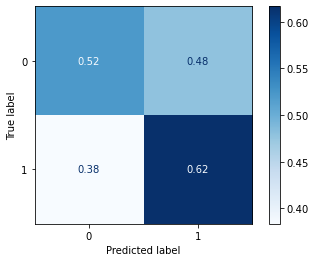

In [179]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.5932721780044681


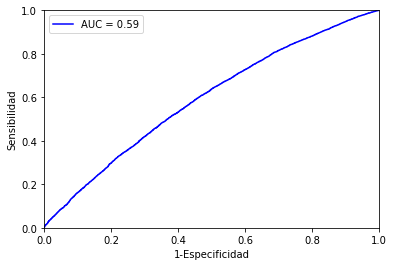

In [180]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [181]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

           0      0.263     0.521     0.350      6972
           1      0.830     0.616     0.708     26510

    accuracy                          0.597     33482
   macro avg      0.547     0.569     0.529     33482
weighted avg      0.712     0.597     0.633     33482



Feature ranking:
1. feature 0 (0.169688)
2. feature 3 (0.090288)
3. feature 8 (0.089979)
4. feature 15 (0.069691)
5. feature 20 (0.059185)
6. feature 21 (0.058462)
7. feature 33 (0.054226)
8. feature 4 (0.047636)
9. feature 16 (0.043307)
10. feature 1 (0.041646)
11. feature 7 (0.034212)
12. feature 23 (0.027912)
13. feature 30 (0.022428)
14. feature 2 (0.019487)
15. feature 5 (0.017740)
16. feature 13 (0.017635)
17. feature 11 (0.016181)
18. feature 6 (0.014441)
19. feature 12 (0.010888)
20. feature 36 (0.009983)
21. feature 10 (0.009116)
22. feature 19 (0.008733)
23. feature 17 (0.008353)
24. feature 29 (0.007135)
25. feature 9 (0.006746)
26. feature 18 (0.006726)
27. feature 14 (0.006658)
28. feature 41 (0.005744)
29. feature 39 (0.005035)
30. feature 26 (0.004627)
31. feature 24 (0.003712)
32. feature 37 (0.002808)
33. feature 38 (0.002739)
34. feature 40 (0.001877)
35. feature 22 (0.001730)
36. feature 27 (0.001243)
37. feature 32 (0.000826)
38. feature 25 (0.000613)
39. feature 35

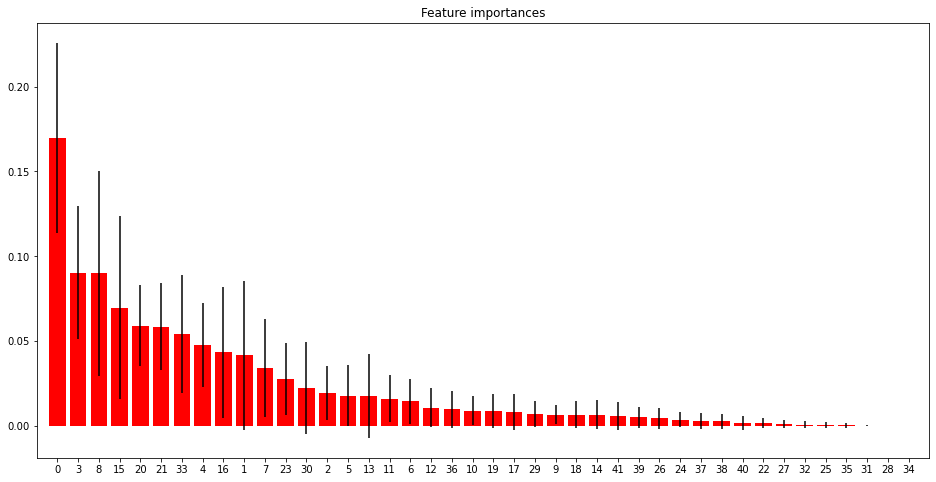

In [182]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random Forest Classifier

In [183]:
X.shape

(111604, 42)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [185]:
X_train.shape

(78122, 42)

In [186]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.8193357624992533

In [187]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[ 2636,  4288],
       [ 1761, 24797]], dtype=int64)

In [188]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[ 2636,  4288],
       [ 1761, 24797]], dtype=int64)

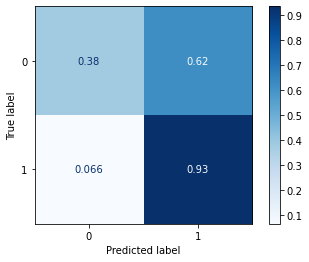

In [189]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.7436631042512102


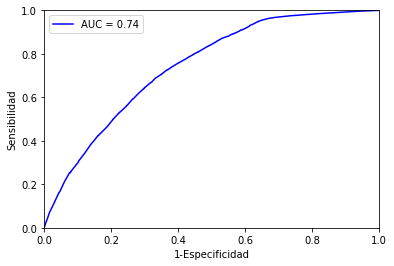

In [190]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [191]:
X_test[0]

array([0.25      , 0.        , 0.        , 0.43333333, 0.02741359,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.31313131, 0.13669065, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [192]:
rfm.predict(np.array([X_test[0]]))

array([1])

In [193]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

           0      0.599     0.381     0.466      6924
           1      0.853     0.934     0.891     26558

    accuracy                          0.819     33482
   macro avg      0.726     0.657     0.678     33482
weighted avg      0.800     0.819     0.803     33482



Feature ranking:
1. feature 0 (0.315349)
2. feature 3 (0.162935)
3. feature 20 (0.137816)
4. feature 21 (0.129831)
5. feature 4 (0.046765)
6. feature 30 (0.017485)
7. feature 33 (0.014321)
8. feature 5 (0.011762)
9. feature 9 (0.010662)
10. feature 7 (0.010499)
11. feature 10 (0.010014)
12. feature 29 (0.009809)
13. feature 39 (0.008955)
14. feature 12 (0.008674)
15. feature 19 (0.008245)
16. feature 18 (0.008225)
17. feature 17 (0.008124)
18. feature 14 (0.008089)
19. feature 8 (0.007684)
20. feature 23 (0.007443)
21. feature 11 (0.007347)
22. feature 24 (0.006784)
23. feature 6 (0.006141)
24. feature 2 (0.005435)
25. feature 1 (0.005204)
26. feature 13 (0.005140)
27. feature 15 (0.004200)
28. feature 16 (0.003493)
29. feature 41 (0.003007)
30. feature 36 (0.002546)
31. feature 26 (0.002080)
32. feature 27 (0.001443)
33. feature 22 (0.001127)
34. feature 38 (0.001026)
35. feature 37 (0.000645)
36. feature 32 (0.000568)
37. feature 40 (0.000552)
38. feature 25 (0.000216)
39. feature 35

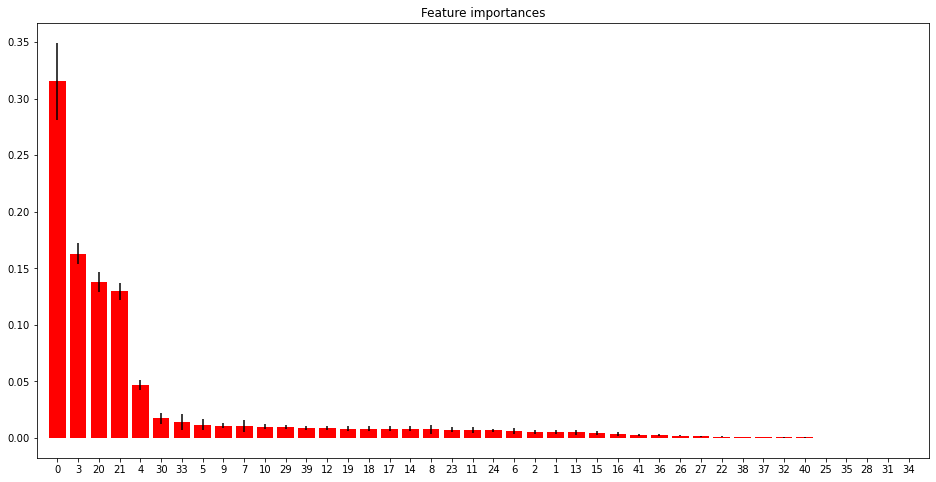

In [194]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [195]:
from tkinter import Tk

ventana_principal = Tk()


## Random Forest Classifier (SMOTE)

In [196]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(sampling_strategy = 0.8).fit_sample(X, y)

In [197]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3)

In [198]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier().fit(X_train_sm, y_train_sm)
ypred = rfm.predict(X_test_sm)
accuracy_score(y_test_sm, ypred)

0.8614465382526219

In [199]:
confusion_matrix(y_test_sm, ypred, labels=[0,1])

array([[17361,  3931],
       [ 2701, 23873]], dtype=int64)

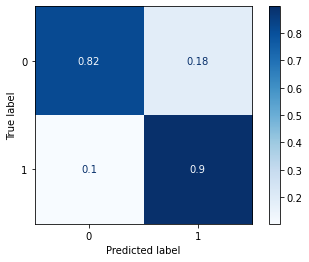

In [200]:
disp = plot_confusion_matrix(rfm, X_test_sm, y_test_sm,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.9199434940065987


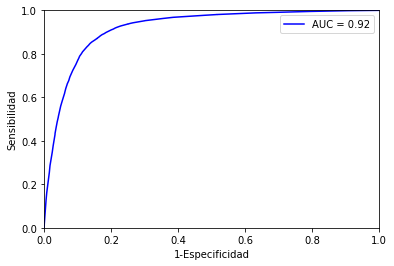

In [201]:
probs = rfm.predict_proba(X_test_sm)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sm, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [202]:
print(classification_report(y_test_sm, ypred, digits=3))

              precision    recall  f1-score   support

           0      0.865     0.815     0.840     21292
           1      0.859     0.898     0.878     26574

    accuracy                          0.861     47866
   macro avg      0.862     0.857     0.859     47866
weighted avg      0.862     0.861     0.861     47866



Feature ranking:
1. feature 0 (0.294202)
2. feature 20 (0.151845)
3. feature 21 (0.151760)
4. feature 3 (0.146005)
5. feature 4 (0.053473)
6. feature 30 (0.015292)
7. feature 33 (0.013784)
8. feature 5 (0.013546)
9. feature 7 (0.012543)
10. feature 9 (0.009373)
11. feature 8 (0.009238)
12. feature 10 (0.008984)
13. feature 29 (0.008061)
14. feature 12 (0.007918)
15. feature 19 (0.007844)
16. feature 14 (0.007677)
17. feature 18 (0.007619)
18. feature 11 (0.007568)
19. feature 17 (0.007475)
20. feature 39 (0.007332)
21. feature 6 (0.007313)
22. feature 23 (0.006543)
23. feature 2 (0.005952)
24. feature 24 (0.005781)
25. feature 1 (0.005578)
26. feature 13 (0.005302)
27. feature 15 (0.004530)
28. feature 16 (0.004172)
29. feature 41 (0.003013)
30. feature 36 (0.002865)
31. feature 26 (0.002008)
32. feature 27 (0.001279)
33. feature 22 (0.001138)
34. feature 38 (0.001098)
35. feature 37 (0.000576)
36. feature 40 (0.000472)
37. feature 32 (0.000344)
38. feature 25 (0.000228)
39. feature 35

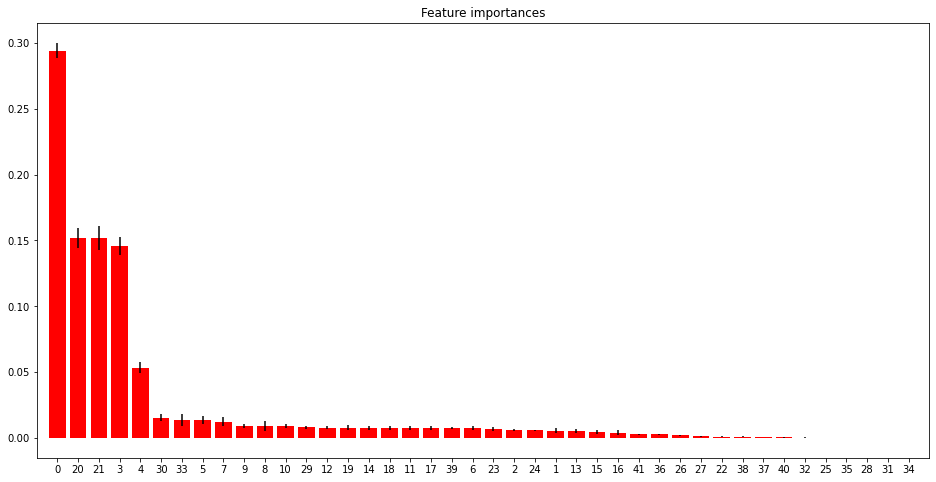

In [203]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X_sm.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_sm.shape[1]), indices)
plt.xlim([-1, X_sm.shape[1]])
plt.show()

## Random Forest Classifier (GridSearchCV)

In [204]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rfm = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# params = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [100, 350, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [7, 15],
#     'min_impurity_decrease' : [0.02, 0.04, 0.2]
# }

# CV_rfm = GridSearchCV(estimator=rfm, param_grid=params, cv= 5)
# CV_rfm.fit(X_train, y_train)
# print (CV_rfm.best_params_) 

##{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [206]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 'auto',
                             class_weight = 'balanced',
                             n_estimators= 100).fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

0.5874798399139837

In [207]:
confusion_matrix(y_test, ypred, labels=[0,1])

array([[ 3643,  3225],
       [10587, 16027]], dtype=int64)

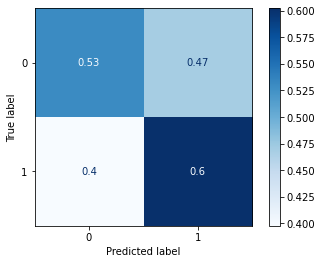

In [208]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.5878449611103653


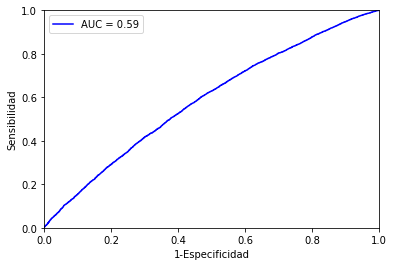

In [209]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [210]:
print(classification_report(y_test, ypred, digits=3))

              precision    recall  f1-score   support

           0      0.256     0.530     0.345      6868
           1      0.832     0.602     0.699     26614

    accuracy                          0.587     33482
   macro avg      0.544     0.566     0.522     33482
weighted avg      0.714     0.587     0.626     33482



Feature ranking:
1. feature 0 (0.146895)
2. feature 8 (0.095774)
3. feature 3 (0.089571)
4. feature 15 (0.070606)
5. feature 1 (0.068427)
6. feature 21 (0.055585)
7. feature 20 (0.053123)
8. feature 4 (0.049629)
9. feature 33 (0.046531)
10. feature 16 (0.038025)
11. feature 13 (0.032146)
12. feature 7 (0.030614)
13. feature 23 (0.029273)
14. feature 2 (0.018562)
15. feature 30 (0.018449)
16. feature 5 (0.016394)
17. feature 36 (0.016318)
18. feature 6 (0.014877)
19. feature 12 (0.012861)
20. feature 41 (0.010227)
21. feature 10 (0.009599)
22. feature 11 (0.009360)
23. feature 17 (0.008885)
24. feature 19 (0.008273)
25. feature 9 (0.008144)
26. feature 29 (0.006470)
27. feature 39 (0.005742)
28. feature 14 (0.004939)
29. feature 18 (0.004851)
30. feature 24 (0.004284)
31. feature 26 (0.003371)
32. feature 40 (0.002160)
33. feature 27 (0.001973)
34. feature 22 (0.001798)
35. feature 32 (0.001708)
36. feature 37 (0.001594)
37. feature 38 (0.001409)
38. feature 25 (0.000715)
39. feature 35

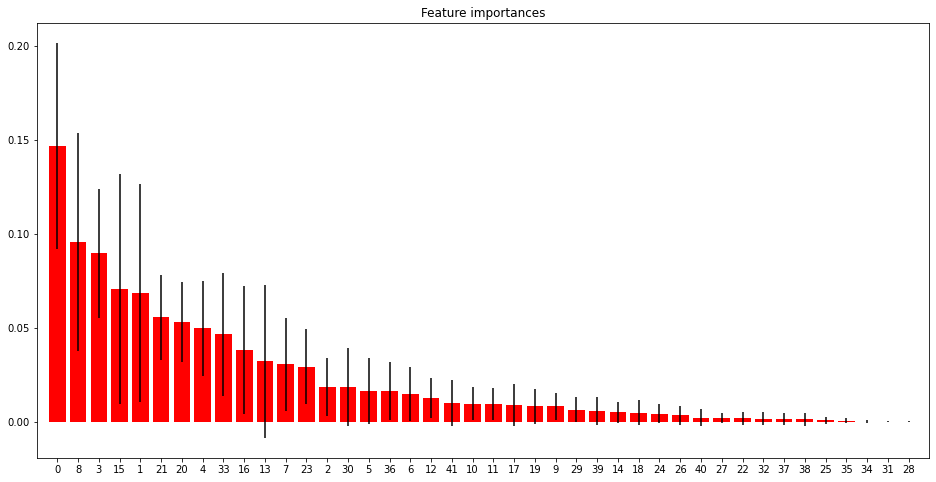

In [211]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [212]:
import pickle

filename = 'randomforest_finalproject.sav'
pickle.dump(rfm, open(filename, 'wb'))

In [213]:
df.columns[4]

'id_neighborhood'

In [214]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Eixample

In [215]:
df_exi = df[df['district_name']=='Eixample'].reset_index()
df_exi.shape

(34193, 97)

In [216]:
X = df_exi[['id_neighborhood', 'weekend', 'holiday', 'tavg', 'rainfall',
       'afternoon', 'early_morning', 'evening', 'morning', 'autumn', 'spring',
       'summer', 'winter', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'wind_direction', 'wind_speed_avg', 'articulated_buses',
       'bike', 'buses', 'construction_vehicles', 'electric_scooter', 'jeep',
       'microbuses', 'moped', 'motorcycle', 'motorhome',
       'non-motorized_transport', 'passenger_car', 'pickup',
       'quad', 'rigid_truck', 'school_buses', 'semi_tractor', 'taxi',
       'tram_or_train', 'truck']]

y = df_exi['severe']

In [217]:
X.wind_speed_avg = X.wind_speed_avg.replace(np.nan, 0)
X.rainfall = X.rainfall.replace(np.nan, 0)
X.tavg = X.tavg.replace(np.nan, 0)
X.wind_direction = X.wind_direction.replace(np.nan, 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [218]:
from collections import Counter
Counter(y)

Counter({nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         1.0: 1042,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         na

## Random Forest Classifier

In [219]:
X.shape

(34193, 42)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [221]:
X_train.shape

(23935, 42)

In [222]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(class_weight = 'balanced').fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
confusion_matrix(y_test, ypred, labels=[0,1])

In [ ]:
confusion_matrix(y_test, ypred, labels=[0,1])

In [ ]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

In [ ]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [ ]:
print(classification_report(y_test, ypred, digits=3))

In [ ]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random Forest Classifier (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

X_sm, y_sm = SMOTE(sampling_strategy = 0.8).fit_sample(X, y)

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier().fit(X_train_sm, y_train_sm)
ypred = rfm.predict(X_test_sm)
accuracy_score(y_test_sm, ypred)

In [ ]:
confusion_matrix(y_test_sm, ypred, labels=[0,1])

In [ ]:
disp = plot_confusion_matrix(rfm, X_test_sm, y_test_sm,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

In [ ]:
probs = rfm.predict_proba(X_test_sm)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test_sm, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [ ]:
print(classification_report(y_test_sm, ypred, digits=3))

In [ ]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_sm.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X_sm.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_sm.shape[1]), indices)
plt.xlim([-1, X_sm.shape[1]])
plt.show()

In [ ]:
X.columns[[3,20,0,21,33,30]]

## Random Forest Classifier (GridSearchCV)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rfm = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

# params = {
#     'criterion': ['gini', 'entropy'],
#     'n_estimators': [100, 350, 700],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [7, 15],
#     'min_impurity_decrease' : [0.02, 0.04, 0.2]
# }

# CV_rfm = GridSearchCV(estimator=rfm, param_grid=params, cv= 5)
# CV_rfm.fit(X_train, y_train)
# print (CV_rfm.best_params_) 

##{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_impurity_decrease': 0.02, 'n_estimators': 100}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 'auto',
                             class_weight = 'balanced',
                             n_estimators= 100).fit(X_train, y_train)
ypred = rfm.predict(X_test)
accuracy_score(y_test, ypred)

In [ ]:
confusion_matrix(y_test, ypred, labels=[0,1])

In [ ]:
disp = plot_confusion_matrix(rfm, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

In [ ]:
probs = rfm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

In [ ]:
print(classification_report(y_test, ypred, digits=3))

In [ ]:
importances = rfm.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize = (16,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()